# RG Flow

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def get_beta_diff(K, dimension):
    """Helper function for fsolve to find roots (beta=0)."""
    K2, K4 = K
    if dimension == 1: 
        K2_eff = K2
        K4_eff = K4
    elif dimension == 2:
        K2_eff = 2 * K2
        K4_eff = 2 * K4

    term = np.exp(2 * K4_eff) * np.cosh(4 * K2_eff) + np.exp(-2 * K4_eff)
    K2_prime = 0.25 * np.log( term / (2 * np.cosh(2 * K4_eff)) )
    K4_prime = 0.25 * np.log( (term * np.cosh(2 * K4_eff)) / (2 * np.cosh(2 * K2_eff)**2) )
    
    # Return difference K' - K (which is proportional to beta)
    return [K2_prime - K2, K4_prime - K4]

def find_fixed_points(dimension):
    """Finds intersections of beta2 and beta4 (fixed points)."""
    guesses = []
    # Grid of initial guesses covering the plot range
    for k2 in np.linspace(-1.0, 1.0, 6):
        for k4 in np.linspace(-1.0, 1.0, 6):
            guesses.append([k2, k4])
    
    fixed_points = []
    for guess in guesses:
        # Solve for K' = K
        root, info, ier, msg = fsolve(get_beta_diff, guess, args=(dimension), full_output=True)
        if ier == 1:
            # Filter valid roots (K >= 0) and unique ones
            if np.all(root >= -1e-6): # Allow small numerical noise
                root = np.maximum(root, 0) # Clamp negative zeros
                # Check uniqueness
                if not any(np.allclose(root, fp, atol=1e-4) for fp in fixed_points):
                    fixed_points.append(root)
                    
    return np.array(fixed_points)

def calculate_rg_flow(dimension):
    # 1. Define the grid for K2 and K4
    k2_range = np.linspace(-1.0, 1.0, 400)
    k4_range = np.linspace(-1.0, 1.0, 400)
    K2, K4 = np.meshgrid(k2_range, k4_range)

    # 2. Define the RG Transformation Equations
    if dimension == 1: 
        K2_eff = K2
        K4_eff = K4
    elif dimension == 2:
        K2_eff = 2 * K2
        K4_eff = 2 * K4

    term = np.exp(2 * K4_eff) * np.cosh(4 * K2_eff) + np.exp(-2 * K4_eff)
    K2_prime = 0.25 * np.log( term / (2 * np.cosh(2 * K4_eff)) )
    K4_prime = 0.25 * np.log( (term * np.cosh(2 * K4_eff)) / (2 * np.cosh(2 * K2_eff)**2) )

    # 3. Calculate Beta Function: beta = (K' - K) / ln(2)
    ln2 = np.log(2)
    beta2 = (K2_prime - K2) / ln2
    beta4 = (K4_prime - K4) / ln2

    # 4. Find Fixed Points
    fixed_points = find_fixed_points(dimension)
    print(f"Fixed Points for d={dimension}:\n{fixed_points}")

    # 5. Visualization
    plt.figure(figsize=(10, 8))

    # A. RG Flow
    magnitude = np.sqrt(beta2**2 + beta4**2)
    strm = plt.streamplot(K2, K4, beta2, beta4, color=magnitude, 
                          cmap='viridis', density=1.2, linewidth=1)
    cbar = plt.colorbar(strm.lines)
    cbar.set_label(r'Flow Magnitude $|\beta|$', fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    # B. Nullclines (Contour where beta = 0)
    cs2 = plt.contour(K2, K4, beta2, levels=[0], colors='red', linewidths=2, linestyles='--')
    cs4 = plt.contour(K2, K4, beta4, levels=[0], colors='blue', linewidths=2, linestyles='--')

    proxy_artists = []; legend_labels = []
    
    h1, _ = cs2.legend_elements()
    if len(h1) > 0:
        proxy_artists.append(h1[0])
        legend_labels.append(r'$\beta_2 = 0$ Nullcline')
        
    h2, _ = cs4.legend_elements()
    if len(h2) > 0:
        proxy_artists.append(h2[0])
        legend_labels.append(r'$\beta_4 = 0$ Nullcline')

    # C. Plot Fixed Points
    if len(fixed_points) > 0:
        scatter = plt.scatter(fixed_points[:, 0], fixed_points[:, 1], color='magenta', s=150, zorder=15, label='Fixed Points', edgecolors='black')
        proxy_artists.append(scatter)
        legend_labels.append('Fixed Points')

    if proxy_artists:
        plt.legend(proxy_artists, legend_labels, loc='upper right', fontsize=12)

    # Formatting
    if dimension == 1:
        plt.title('RG Flows and Nullclines (1D)', fontsize=20)
    elif dimension == 2:
        plt.title('RG Flows and Nullclines (2D Migdal-Kadanoff)', fontsize=20)
    plt.xlabel(r'$K_2$', fontsize=18); plt.ylabel(r'$K_4$', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 1D Model
The 1D model does not exhibit non-trivial, finite-temperature phase transitions.

C:\Users\huang\AppData\Local\Temp\ipykernel_42596\2971351647.py:15: RuntimeWarning: overflow encountered in cosh
  term = np.exp(2 * K4_eff) * np.cosh(4 * K2_eff) + np.exp(-2 * K4_eff)
C:\Users\huang\AppData\Local\Temp\ipykernel_42596\2971351647.py:17: RuntimeWarning: overflow encountered in scalar power
  K4_prime = 0.25 * np.log( (term * np.cosh(2 * K4_eff)) / (2 * np.cosh(2 * K2_eff)**2) )
C:\Users\huang\AppData\Local\Temp\ipykernel_42596\2971351647.py:17: RuntimeWarning: invalid value encountered in scalar divide
  K4_prime = 0.25 * np.log( (term * np.cosh(2 * K4_eff)) / (2 * np.cosh(2 * K2_eff)**2) )


Fixed Points for d=1:
[[0. 0.]]


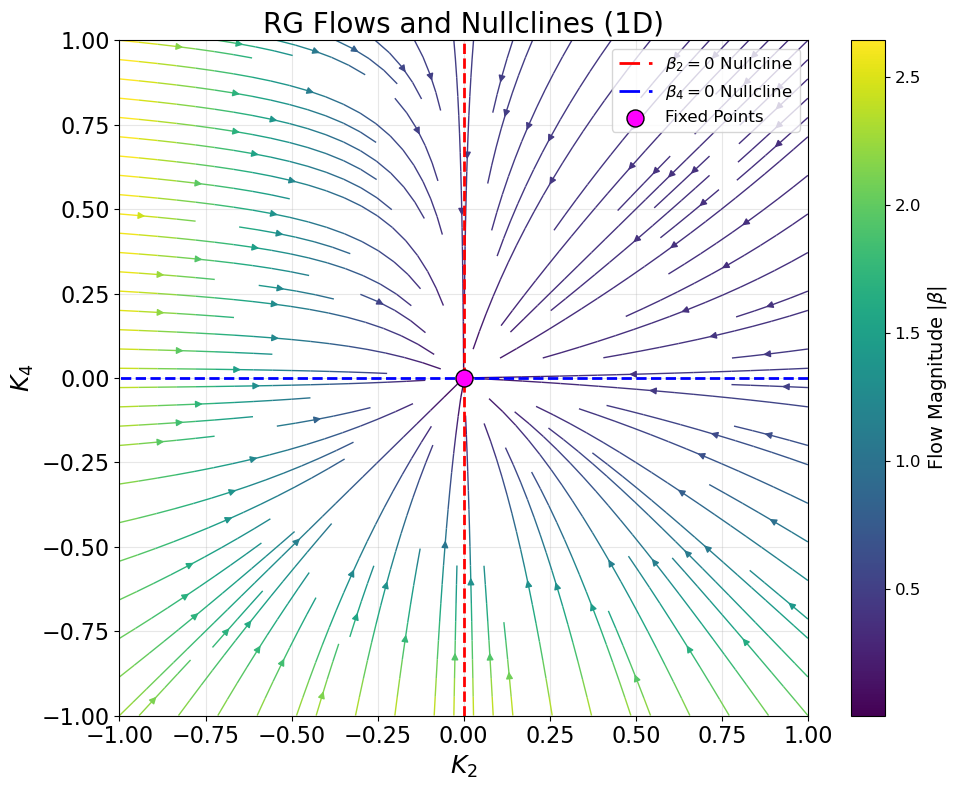

In [37]:
if __name__ == "__main__":
    calculate_rg_flow(1)

## 2D Model
The 2D model exhibits non-trivial, finite-temperature phase transitions.

Fixed Points for d=2:
[[0.00000000e+00 0.00000000e+00]
 [2.38416556e-13 3.04688932e-01]
 [1.89076903e-01 1.89076903e-01]
 [3.04688932e-01 3.78444037e-12]]


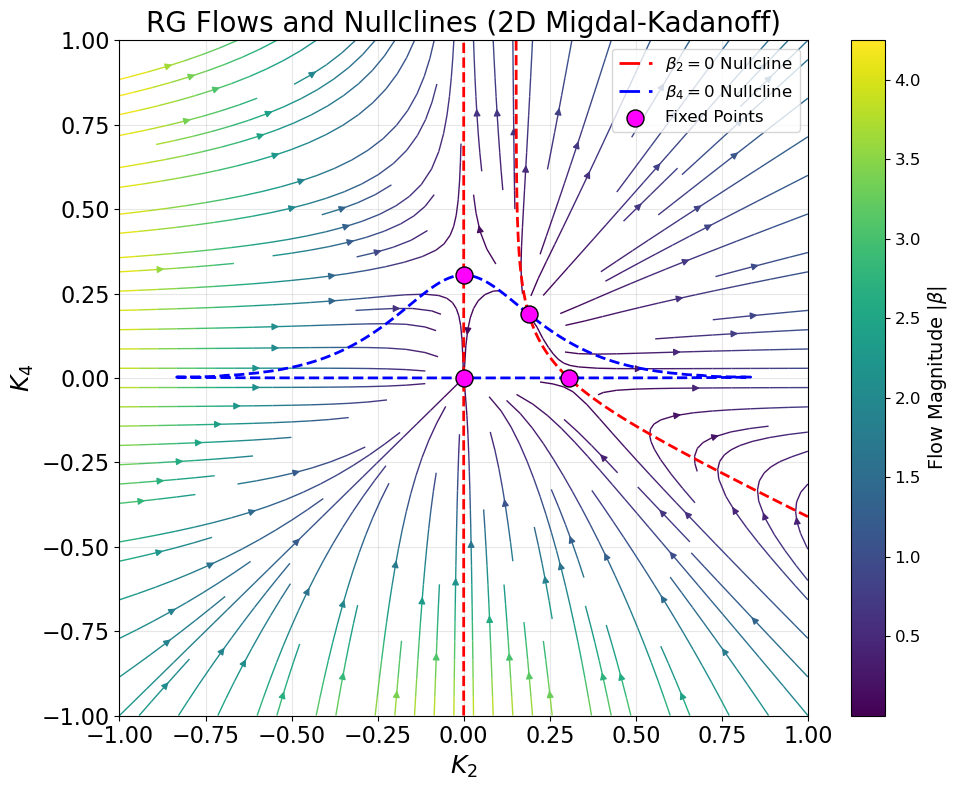

In [38]:
if __name__ == "__main__":
    calculate_rg_flow(2)

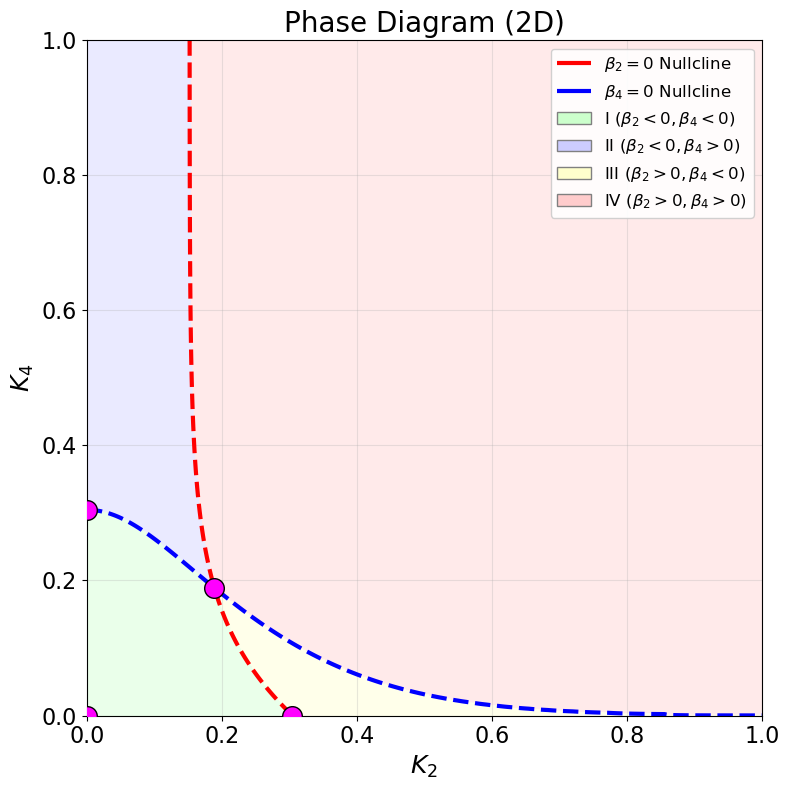

In [46]:
# Phase Diagram Illustration (Nullclines only)
def plot_phase_diagram_illustration():
    # Grid 0 to 1
    k_range = np.linspace(0.0001, 1.0, 500)
    K2, K4 = np.meshgrid(k_range, k_range)

    # 2D Equations
    K2_eff = 2 * K2
    K4_eff = 2 * K4
    term = np.exp(2 * K4_eff) * np.cosh(4 * K2_eff) + np.exp(-2 * K4_eff)
    K2_prime = 0.25 * np.log( term / (2 * np.cosh(2 * K4_eff)) )
    K4_prime = 0.25 * np.log( (term * np.cosh(2 * K4_eff)) / (2 * np.cosh(2 * K2_eff)**2) )
    
    ln2 = np.log(2)
    beta2 = (K2_prime - K2) / ln2
    beta4 = (K4_prime - K4) / ln2

    # Find fixed points in range
    fps = find_fixed_points(2)
    fps = fps[(fps[:,0] >= 0) & (fps[:,0] <= 1) & (fps[:,1] >= 0) & (fps[:,1] <= 1)]

    plt.figure(figsize=(10, 8)) # Increased width for legend
    
    # Define regions based on signs of beta functions
    # 0: beta2 > 0, beta4 > 0 (Both increasing)
    # 1: beta2 < 0, beta4 > 0 (K2 decreasing, K4 increasing)
    # 2: beta2 < 0, beta4 < 0 (Both decreasing)
    # 3: beta2 > 0, beta4 < 0 (K2 increasing, K4 decreasing)
    
    regions = np.zeros_like(beta2, dtype=int)
    regions[(beta2 > 0) & (beta4 > 0)] = 0
    regions[(beta2 < 0) & (beta4 > 0)] = 1
    regions[(beta2 < 0) & (beta4 < 0)] = 2
    regions[(beta2 > 0) & (beta4 < 0)] = 3
    
    from matplotlib.colors import ListedColormap
    from matplotlib.patches import Patch

    # Colors corresponding to regions 0, 1, 2, 3
    # 0 (+,+): Red tint
    # 1 (-,+): Blue tint
    # 2 (-,-): Green tint
    # 3 (+,-): Yellow/Orange tint
    colors = ['#ffcccc', '#ccccff', '#ccffcc', '#ffffcc'] 
    cmap = ListedColormap(colors)
    
    # Plot regions
    plt.imshow(regions, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=0.4)

    # Nullclines
    cs2 = plt.contour(K2, K4, beta2, levels=[0], colors='red', linewidths=3, linestyles='--')
    cs4 = plt.contour(K2, K4, beta4, levels=[0], colors='blue', linewidths=3, linestyles='--')
    
    # Fixed Points
    plt.scatter(fps[:, 0], fps[:, 1], color='magenta', s=200, zorder=10, edgecolors='black', label='Fixed Points')
    
    # Legend Construction
    legend_elements = []
    
    # Nullclines
    h1, _ = cs2.legend_elements()
    h2, _ = cs4.legend_elements()
    legend_elements.append(h1[0])
    legend_elements.append(h2[0])
    
    # Region Patches
    legend_elements.append(Patch(facecolor=colors[2], edgecolor='gray', label=r'I $(\beta_2 < 0, \beta_4 < 0)$'))
    legend_elements.append(Patch(facecolor=colors[1], edgecolor='gray', label=r'II $(\beta_2 < 0, \beta_4 > 0)$'))
    legend_elements.append(Patch(facecolor=colors[3], edgecolor='gray', label=r'III $(\beta_2 > 0, \beta_4 < 0)$'))
    legend_elements.append(Patch(facecolor=colors[0], edgecolor='gray', label=r'$\beta_2 > 0, \beta_4 > 0$'))

    labels = [r'$\beta_2 = 0$ Nullcline', r'$\beta_4 = 0$ Nullcline',
              r'I $(\beta_2 < 0, \beta_4 < 0)$', r'II $(\beta_2 < 0, \beta_4 > 0)$',
              r'III $(\beta_2 > 0, \beta_4 < 0)$', r'IV $(\beta_2 > 0, \beta_4 > 0)$']

    plt.legend(handles=legend_elements, labels=labels, fontsize=12, loc='upper right', framealpha=0.9)
    
    plt.title('Phase Diagram (2D)', fontsize=20)
    plt.xlabel(r'$K_2$', fontsize=18)
    plt.ylabel(r'$K_4$', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_phase_diagram_illustration()